In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Load the dataset
file_path = r"C:\Users\FREDDIE\Downloads\seoul+bike+sharing+demand\SeoulBikeData.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(data.head())


         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [3]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate the synthetic dataset
X, y = make_classification(n_samples=1000, n_features=6, n_informative=6, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, flip_y=0.01, class_sep=2, random_state=42)

# Create a DataFrame with the features
df = pd.DataFrame(X, columns=["A", "B", "C", "D", "E", "F"])

# Add the target variable to the DataFrame
df["Y"] = y

# Display the DataFrame
print(df)


            A         B         C         D         E         F  Y
0   -1.261788  0.188210  3.349291  1.444857  0.594450 -0.733661  1
1   -2.668346  1.307516  1.973266  2.567546 -5.559726  6.207219  1
2   -1.868694 -1.556724  2.218503  2.336441  2.277631 -2.020119  0
3   -1.833916  1.101607 -2.402815  0.791633 -3.314383 -1.038718  2
4   -1.993232  2.795002  1.613294  1.650673 -2.780111  2.138409  1
..        ...       ...       ...       ...       ...       ... ..
995 -0.388204 -3.690033 -0.902985 -3.245888 -0.506143 -1.441418  2
996 -0.682503 -1.233998  4.064590  3.591441  0.650759 -1.599855  0
997 -0.758454  0.657099  1.509165 -0.242442 -1.439492  2.928793  1
998 -2.595326 -2.577785  0.459839  4.547929  0.261112 -1.142054  0
999 -3.358939  2.276343  3.126801  2.981961 -3.319673  3.176095  1

[1000 rows x 7 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
 4   E       1000 non-null   float64
 5   F       1000 non-null   float64
 6   Y       1000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 50.9 KB


no missing values

In [5]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
Y    0
dtype: int64

In [6]:
df = df.dropna()

<Axes: xlabel='A', ylabel='B'>

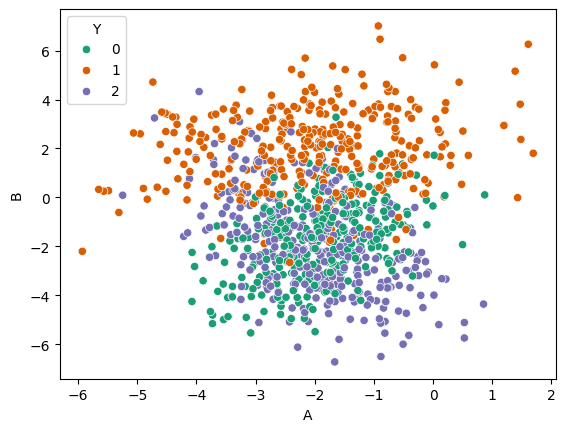

In [9]:
sns.scatterplot(x='A',y='B',data=df,hue='Y',palette='Dark2')

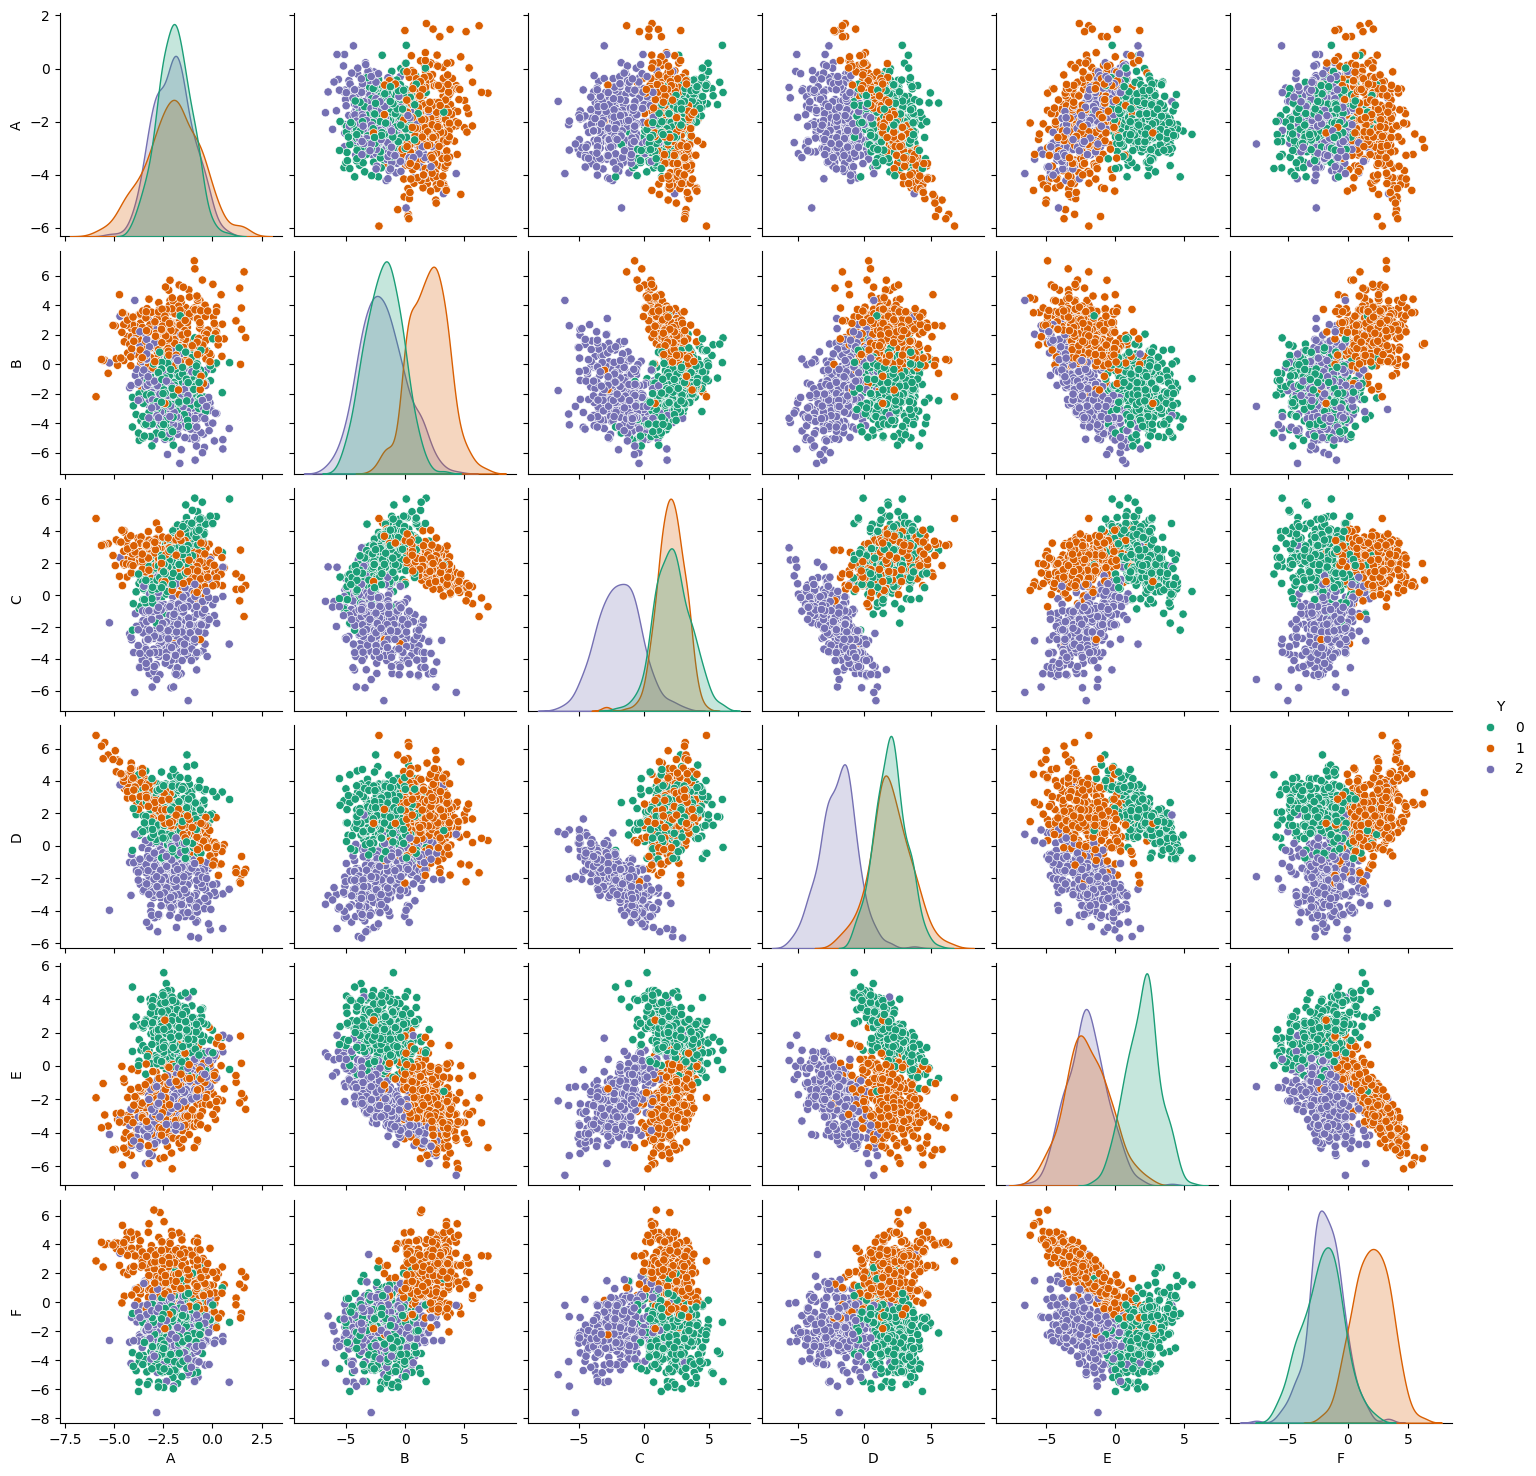

In [10]:

sns.pairplot(df,hue='Y',palette='Dark2')

In [11]:

from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:

from sklearn.tree import DecisionTreeClassifier

In [14]:

model = DecisionTreeClassifier()

In [15]:

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:

base_pred = model.predict(X_test)

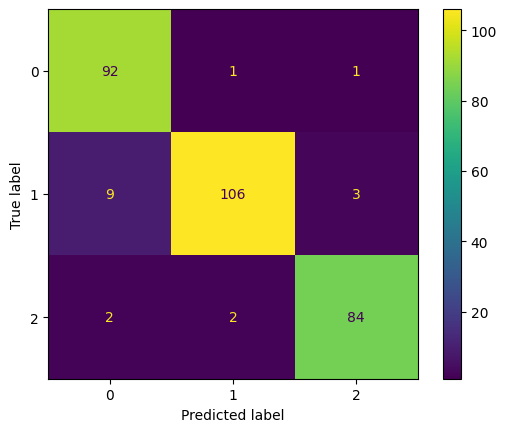

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and X_test, y_test are your test datasets.
# First, you need to predict the test set outcomes.
y_pred = model.predict(X_test)

# Now, compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Then, create the display object for the confusion matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Finally, use the display object to plot the matrix.
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [19]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        94
           1       0.97      0.90      0.93       118
           2       0.95      0.95      0.95        88

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [20]:
model.feature_importances_

array([0.000494  , 0.04656235, 0.40353453, 0.06107578, 0.39278288,
       0.09555046])

In [23]:
from sklearn.ensemble import RandomForestRegressor
features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
target = 'Rented Bike Count'

X = data[features]
y = data[target]

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

# Display the DataFrame
print(feature_importances)

                           Feature Importance
Temperature(°C)                      0.392241
Humidity(%)                          0.198321
Wind speed (m/s)                     0.096403
Visibility (10m)                     0.071459
Dew point temperature(°C)            0.098252
Solar Radiation (MJ/m2)              0.125468
Rainfall(mm)                         0.017111
Snowfall (cm)                        0.000745


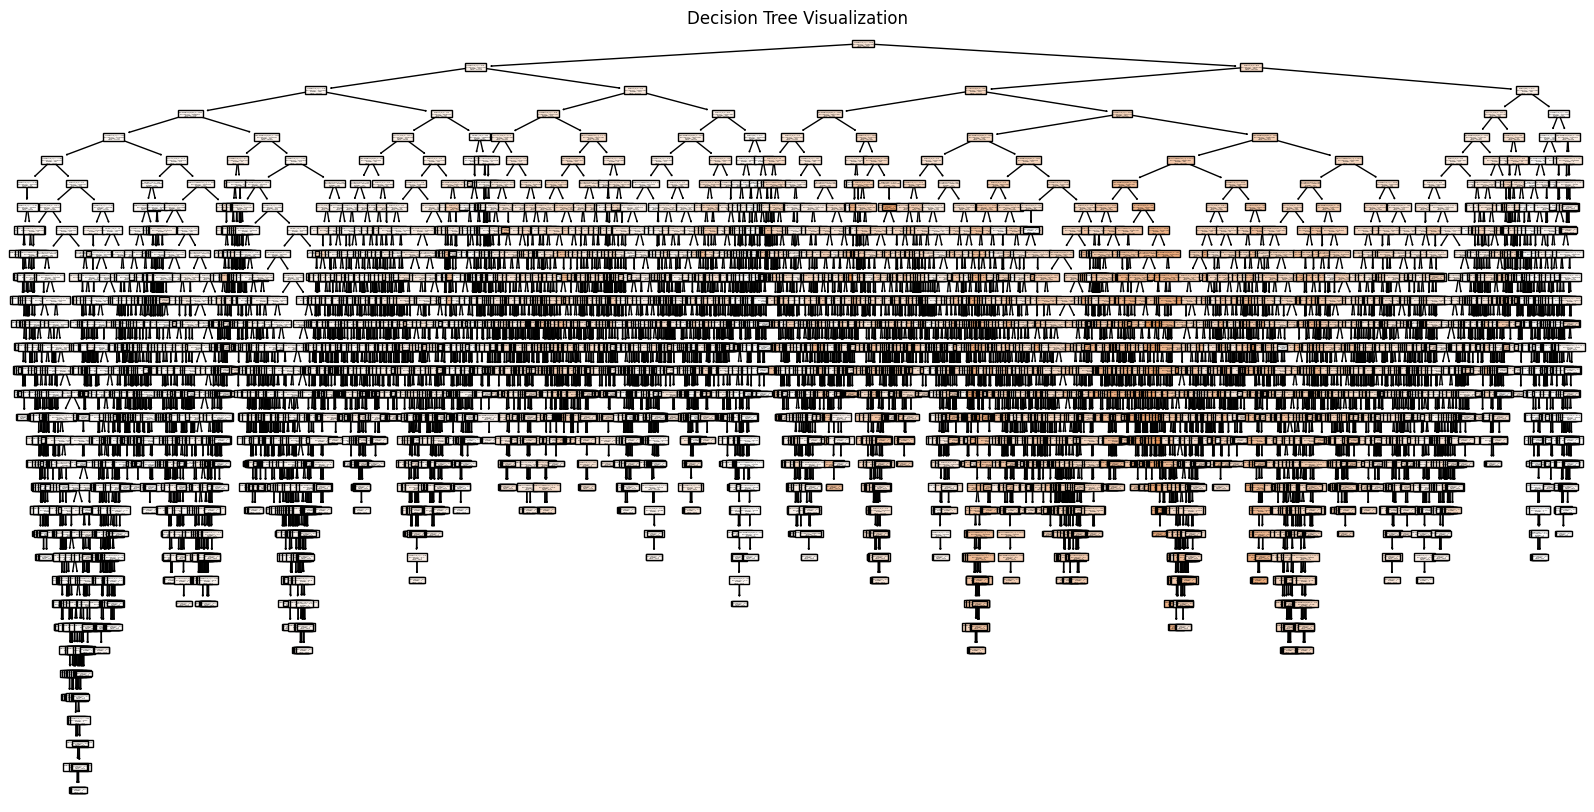

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Extract a single decision tree from the forest
single_tree = model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=features)
plt.title("Decision Tree Visualization")
plt.show()

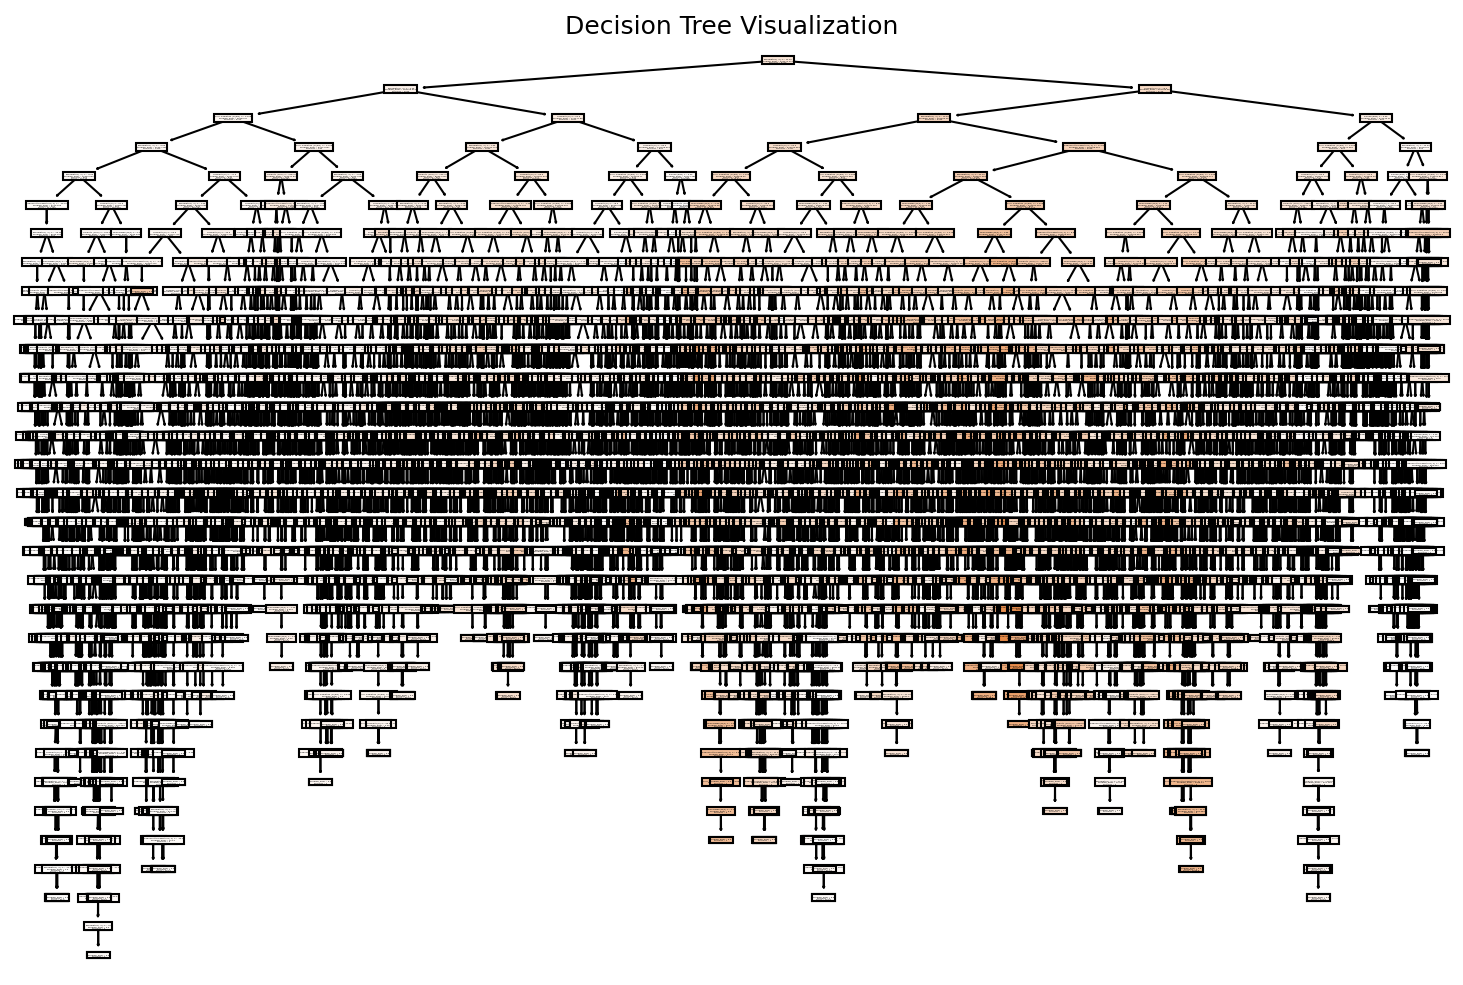

In [32]:
X = data[features]
y = data[target]

# Train a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model, filled=True, feature_names=features)
plt.title("Decision Tree Visualization")
plt.show()

In [38]:
def report_model(model, X_test, y_test, feature_names):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=feature_names)
    plt.show()


In [34]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        94
           1       0.92      0.84      0.88       118
           2       0.95      0.91      0.93        88

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.90      0.90      0.90       300





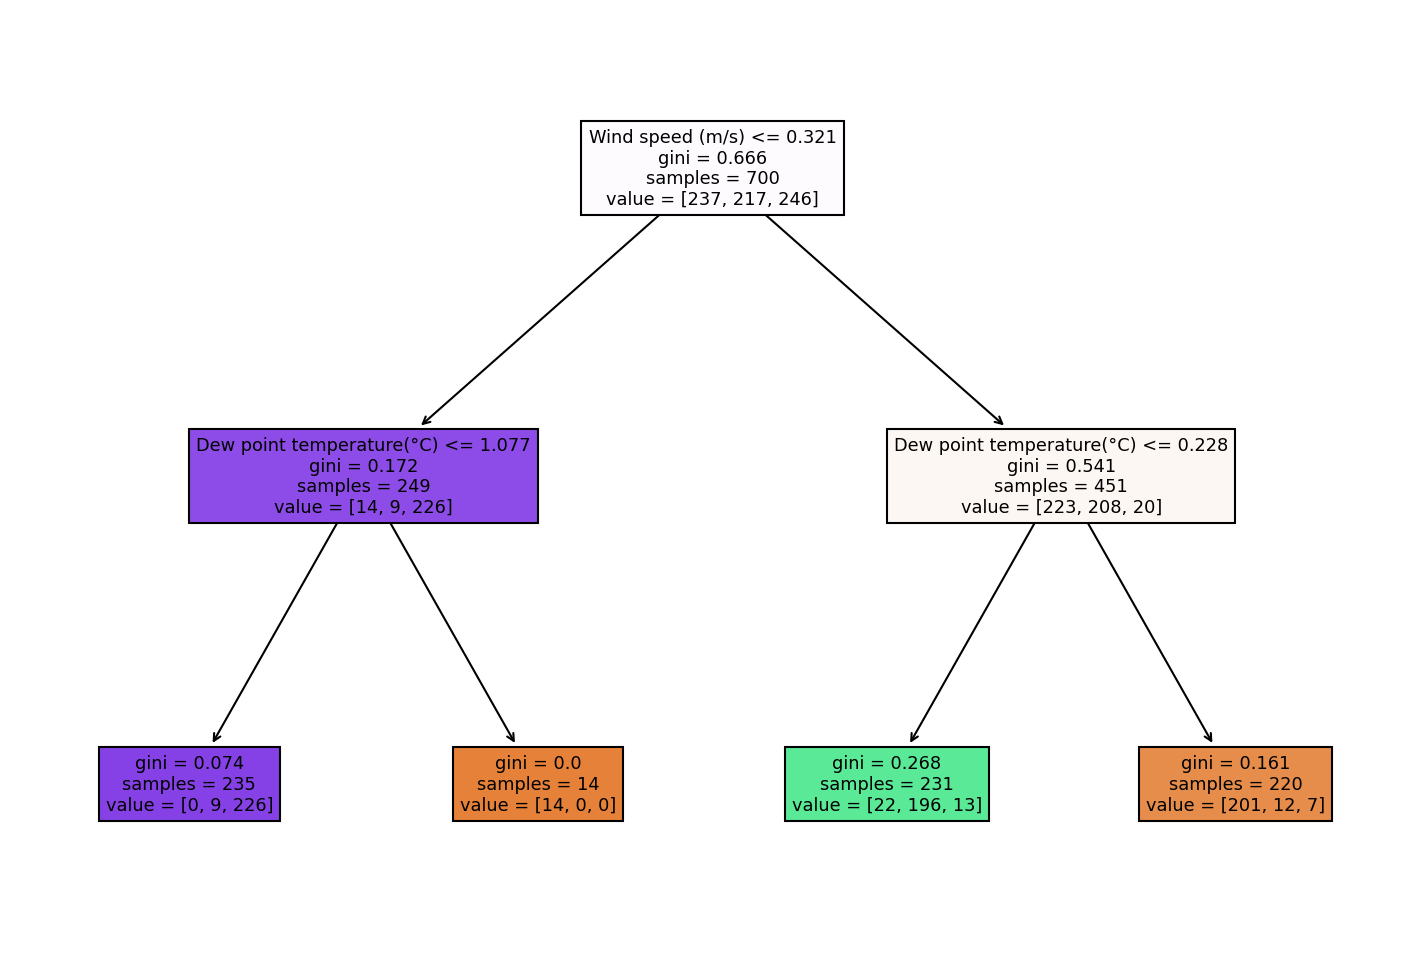

In [39]:
# Call report_model function with the pruned_tree model and appropriate feature names
report_model(pruned_tree, X_test, y_test, features)



              precision    recall  f1-score   support

           0       0.84      0.89      0.87        94
           1       0.92      0.84      0.88       118
           2       0.88      0.92      0.90        88

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300





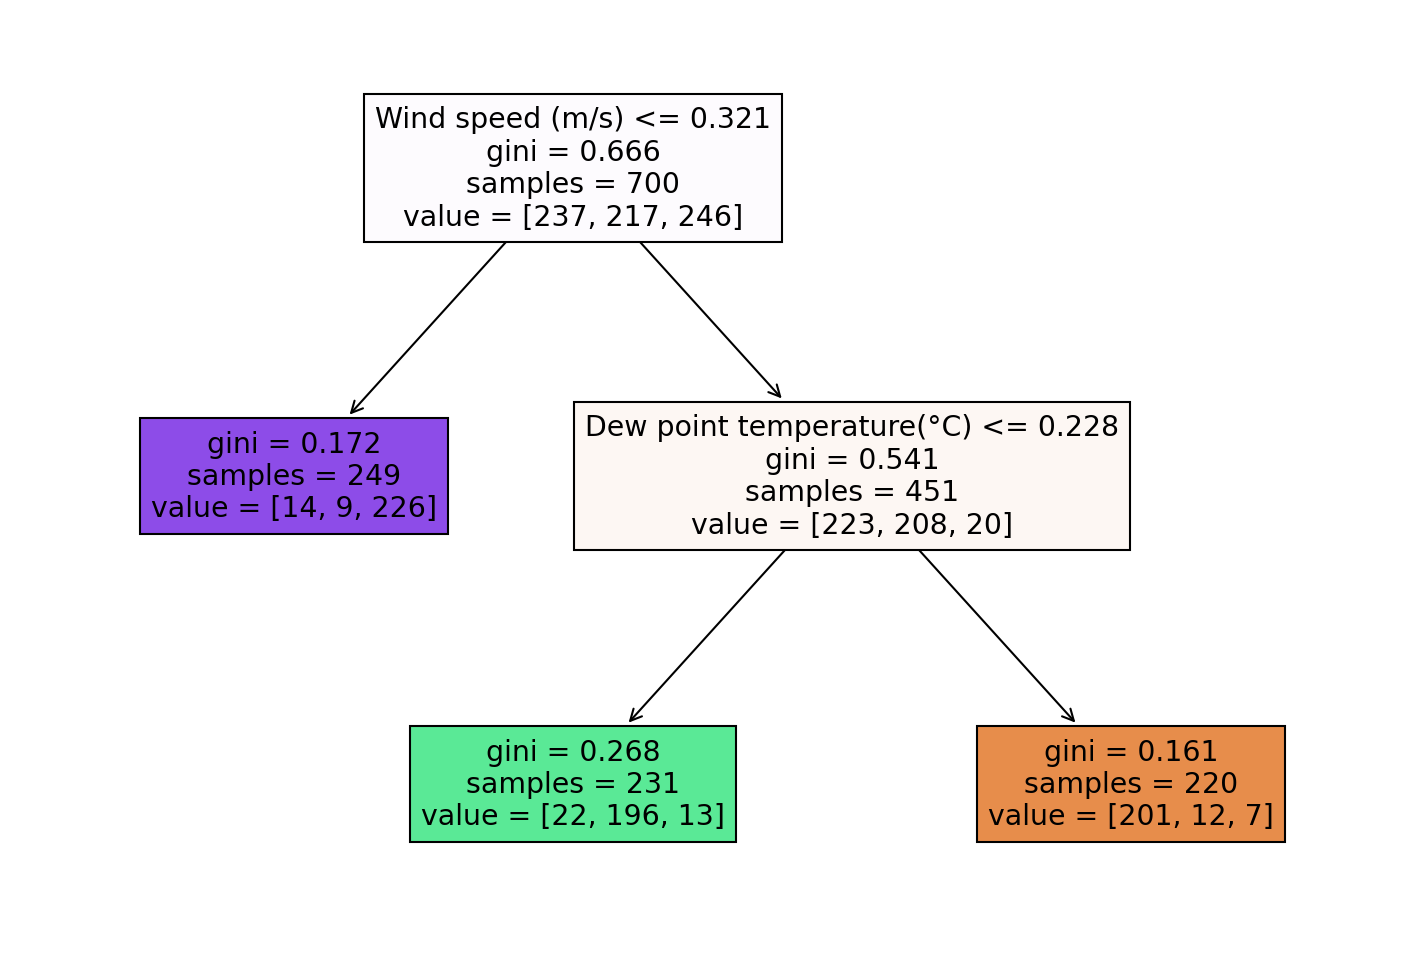

In [42]:
# Define and train the pruned decision tree
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train, y_train)

# Call report_model function with the pruned_tree model and appropriate arguments
report_model(pruned_tree, X_test, y_test, features)


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        94
           1       0.97      0.91      0.94       118
           2       0.92      0.97      0.94        88

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300





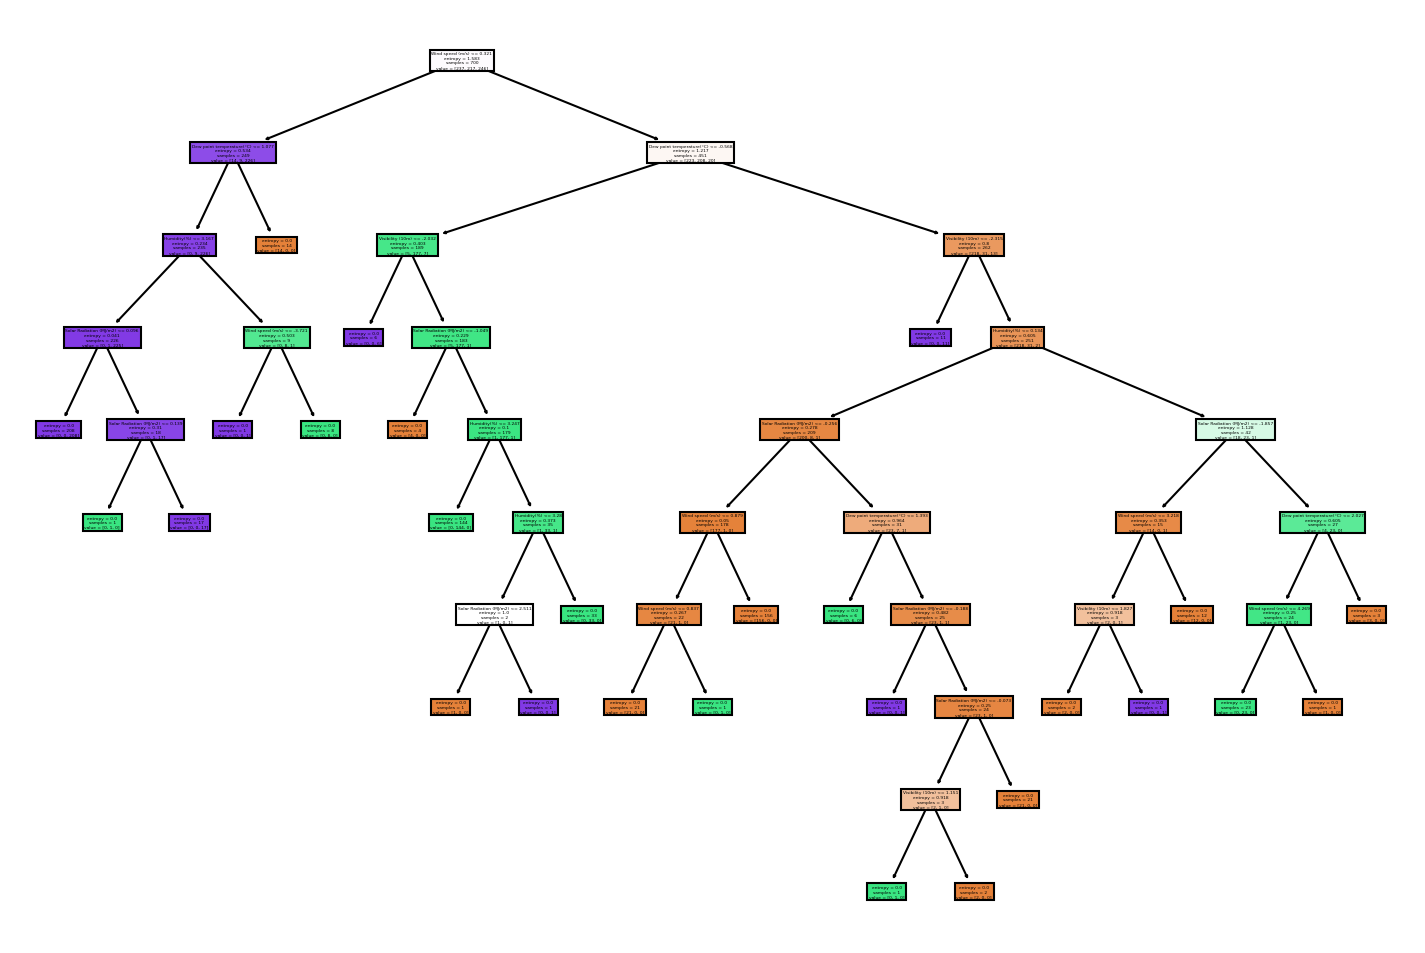

In [43]:
# Train a decision tree with entropy criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)

# Call report_model function with the entropy_tree model and appropriate arguments
report_model(entropy_tree, X_test, y_test, features)
